In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement.csv')

In [6]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

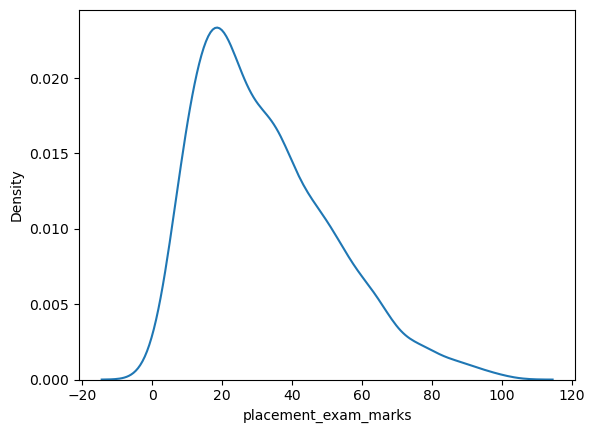

In [8]:
sns.kdeplot(df['placement_exam_marks']) #rightly skewed data

In [10]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [12]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

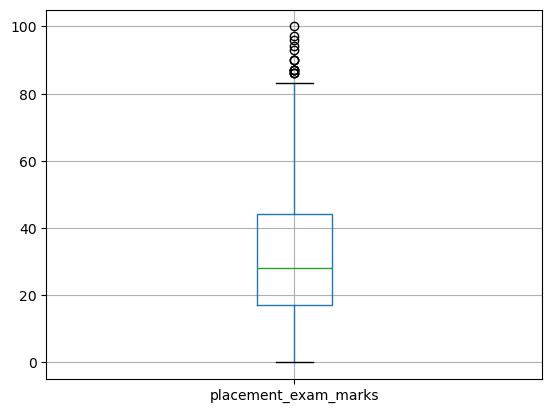

In [14]:
df.boxplot(column='placement_exam_marks')

<Axes: ylabel='placement_exam_marks'>

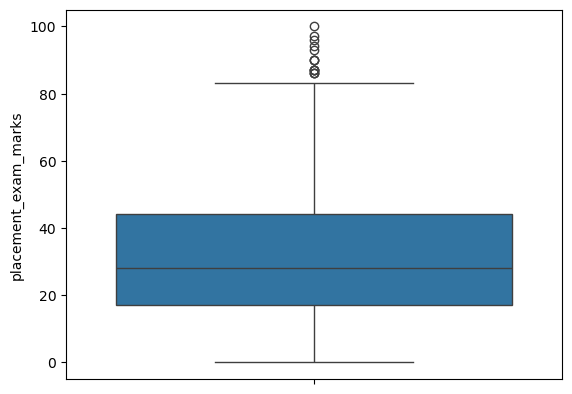

In [16]:
sns.boxplot(df['placement_exam_marks'])

In [18]:
#Finding IQR

percent25 = df['placement_exam_marks'].quantile(0.25)
percent75 = df['placement_exam_marks'].quantile(0.75)

In [20]:
print('25 percentile of the column is : ', percent25)
print('75 percentile of the column is : ',percent75)

25 percentile of the column is :  17.0
75 percentile of the column is :  44.0


In [22]:
IQR = percent75 - percent25

In [24]:
IQR

27.0

In [26]:
upper_limit = percent75 + 1.5*IQR
lower_limit = percent25 - 1.5*IQR

In [28]:
print('upper limit of the column is : ', upper_limit)
print('lower limit of the column is : ',lower_limit)

upper limit of the column is :  84.5
lower limit of the column is :  -23.5


In [39]:
# Finding the outliers

outliers = df[(df['placement_exam_marks']>upper_limit)]

In [32]:

df[(df['placement_exam_marks']<lower_limit)]

,cgpa,placement_exam_marks,placed


<h1>Trimming</h1>

In [35]:
new_df = df[(df['placement_exam_marks']<upper_limit)]

In [37]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [47]:
outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [49]:
outliers.shape

(15, 3)

In [51]:
df.shape

(1000, 3)

<Axes: ylabel='placement_exam_marks'>

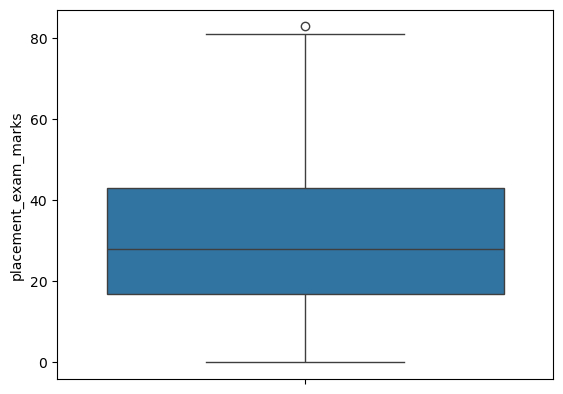

In [57]:
sns.boxplot(new_df['placement_exam_marks'])

In [59]:
new_df['placement_exam_marks'].skew()

0.6549925627115251

In [61]:
df['placement_exam_marks'].skew()

0.8356419499466834

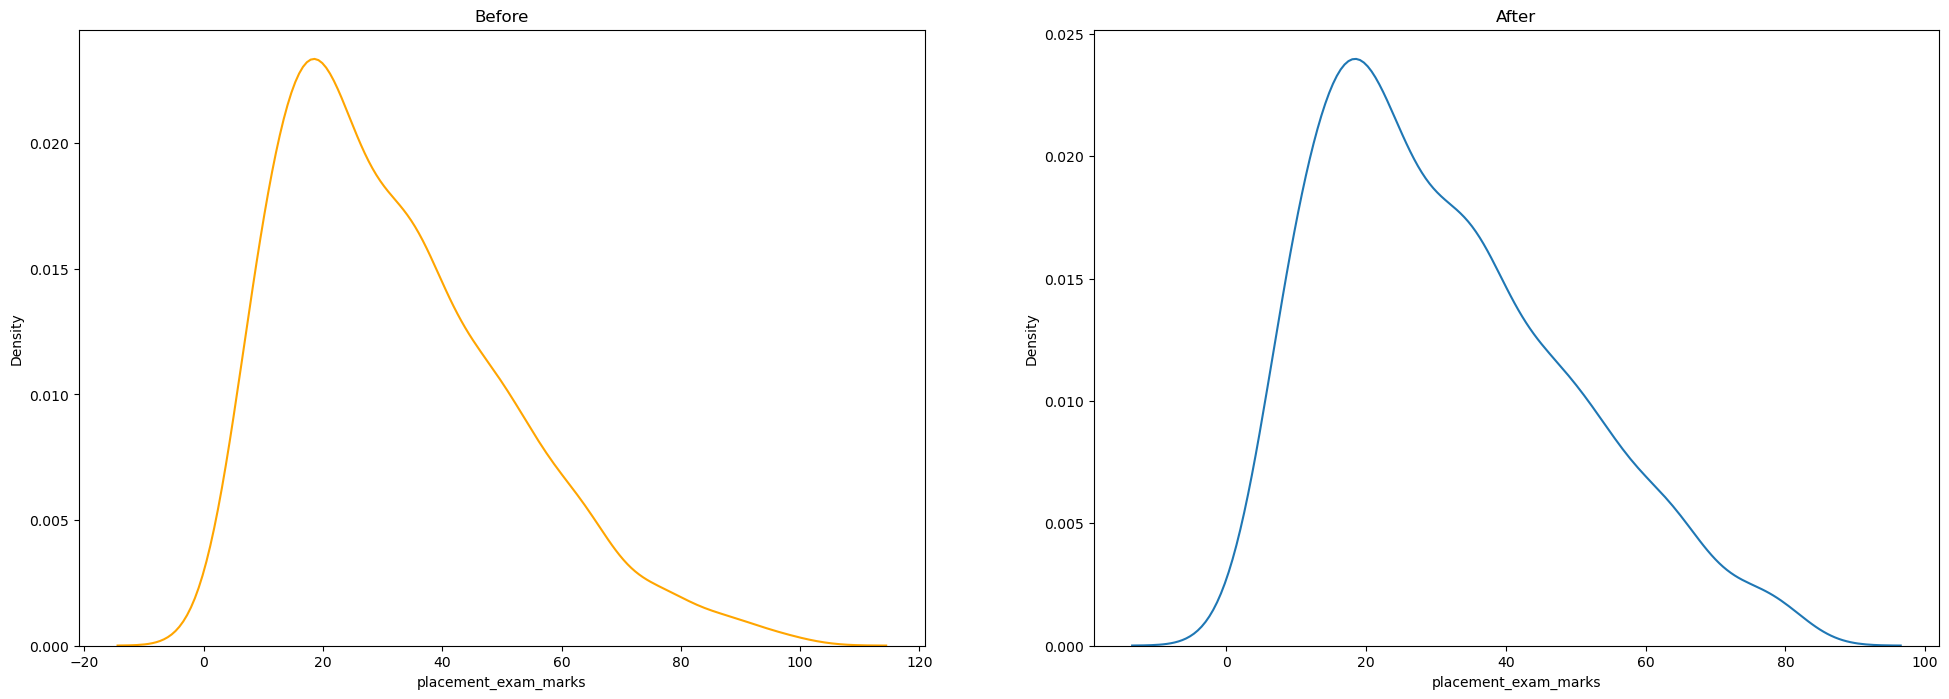

In [79]:
plt.figure(figsize=(24,8))
plt.subplot(121)
sns.kdeplot(df['placement_exam_marks'] , color='orange')
plt.title("Before")

plt.subplot(122)
sns.kdeplot(new_df['placement_exam_marks'])
plt.title("After")
plt.show()


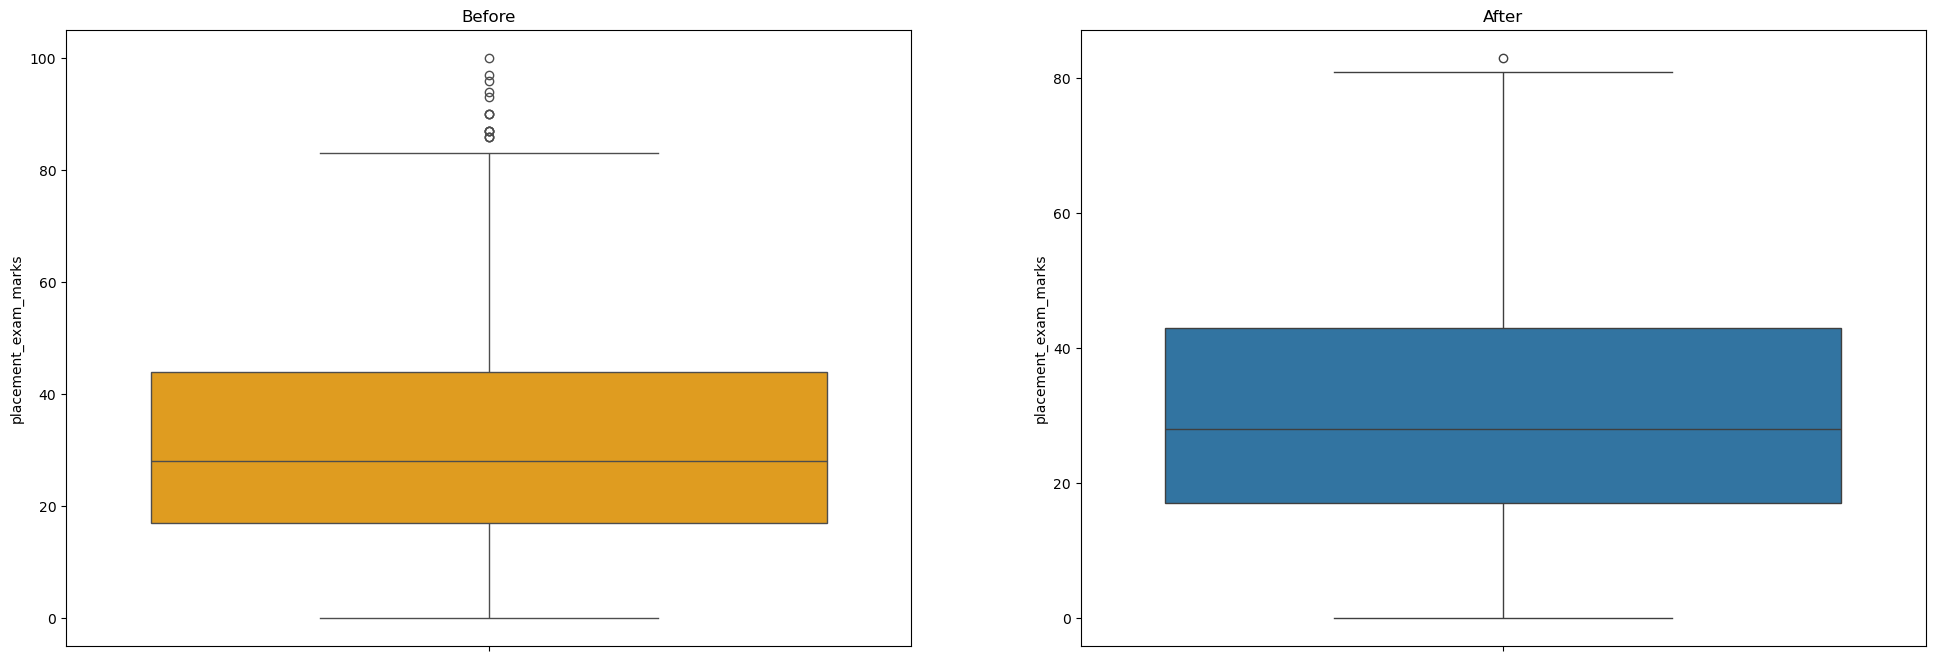

In [83]:
plt.figure(figsize=(24,8))
plt.subplot(121)
sns.boxplot(df['placement_exam_marks'] , color='orange')
plt.title("Before")

plt.subplot(122)
sns.boxplot(new_df['placement_exam_marks'])
plt.title("After")
plt.show()


<h1>Capping</h1>

In [86]:
new_df_cap = df.copy()

In [88]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [92]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks']>upper_limit, upper_limit, np.where(new_df_cap['placement_exam_marks']<lower_limit,lower_limit,new_df_cap['placement_exam_marks'])
)

In [94]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: ylabel='placement_exam_marks'>

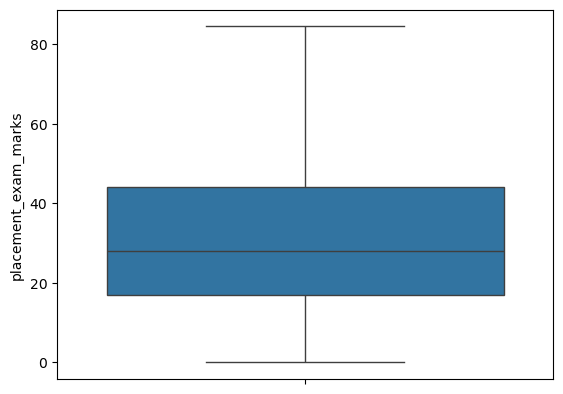

In [96]:
sns.boxplot(new_df_cap['placement_exam_marks'])

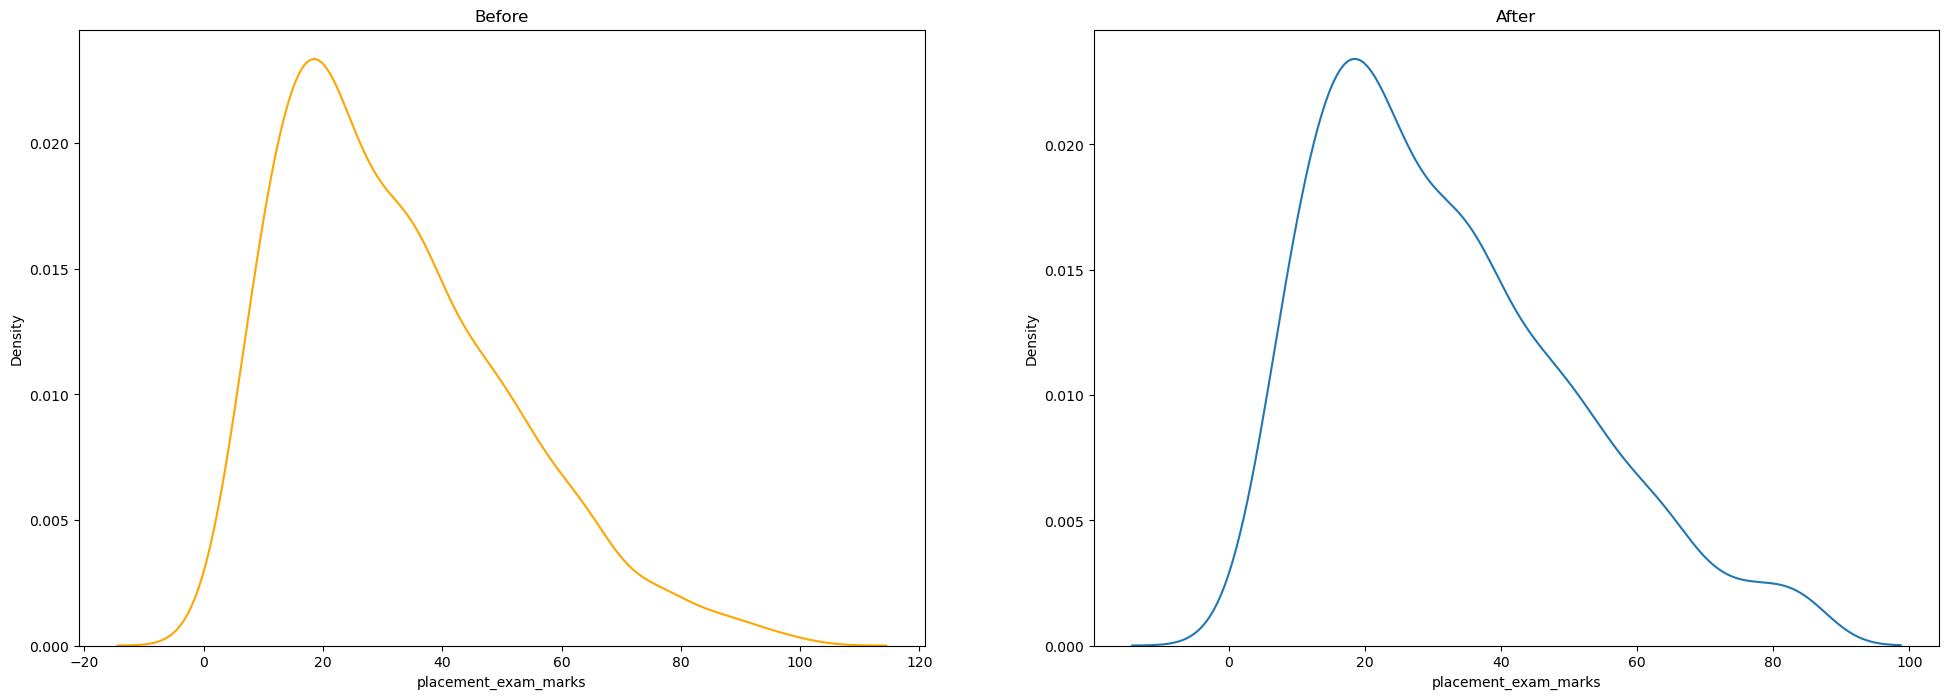

In [98]:
plt.figure(figsize=(24,8))
plt.subplot(121)
sns.kdeplot(df['placement_exam_marks'] , color='orange')
plt.title("Before")

plt.subplot(122)
sns.kdeplot(new_df_cap['placement_exam_marks'])
plt.title("After")
plt.show()
